#Predicting the Value of AI Tools on Student Performance and Trust

#Stage 1

###Dataset Selection

For this project, we selected a dataset that captures students’ usage of AI tools, their academic performance, and trust levels. The dataset is particularly relevant in today’s context where AI tools are increasingly integrated into education.

It allows us to explore the relationship between AI tool adoption, student outcomes, and trust.

It supports both classification tasks (e.g., predicting whether a student has high/low performance based on AI tool usage) and regression tasks (e.g., predicting trust levels).

It contains both numerical and categorical variables, giving us opportunities for data preprocessing like handling missing values, encoding, scaling, and outlier detection.

###Objective

To analyze how different AI tools influence students’ academic performance and trust, and to predict whether students are willing to pay for AI tools based on their usage patterns, trust level, and academic outcomes.

###Outcomes

Identify Key Factors – Discover which features (usage hours, trust, preferred tool, grades impact, etc.) most influence a student’s willingness to pay.

Tool Effectiveness Insights – Understand which AI tools are perceived as the most impactful and trusted by students.

Student Segmentation – Group students based on usage behavior (e.g., heavy users vs. casual users, high-trust vs. low-trust).

Prediction Model – Build an ML model that predicts if a student is willing to pay for AI tools with reasonable accuracy.

Decision Support – Provide recommendations for educators, institutions, or AI tool developers about adoption and pricing strategies.

###Practical Outcomes:

Colleges/companies can design targeted campaigns.

Tool providers know where to focus: usability? trust? impact?

### Source: Kaggle | Timeline: 2025 | Location: INDIA

###Type of Problem

Supervised Learning – Classification (Primary)
Predict whether a student is willing to pay for an AI tool (Yes/No).

(Optional secondary tasks I planned to perform if I have enough time)

Regression: predict Trust_in_AI_Tools or Impact_on_Grades (numeric).

Multi-class Classification: bucket Impact_on_Grades (e.g., Low/Med/High).

###Possible Algorithms Planned to Use


Logistic Regression

Decision Tree

Random Forest

XGBoost / Gradient Boosting

Support Vector Machine (SVM)

Naive Bayes (baseline)

###Feature Description

####Input Features

Year_of_Study → Student’s current academic year.

AI_Tools_Used → List of AI tools the student uses.

Daily_Usage_Hours → Average hours spent on AI tools daily.

Use_Cases → Purpose of using AI tools (assignments, coding, etc.).

Trust_in_AI_Tools → Student’s trust level in AI tools.

Impact_on_Grades → Effect of AI tools on academic performance.

Do_Professors_Allow_Use → Whether professors permit AI tool usage.

Preferred_AI_Tool → Student’s most preferred AI tool.

Awareness_Level → Student’s awareness about AI tools.

State → Geographic location of the student.

Device_Used → Device used to access AI tools.

Internet_Access → Quality of internet access.

Stream → Academic stream of the student.

College_Name → Institution where the student studies.

Student_Name → Identifier only (not useful for prediction).

####Target Feature

Willing_to_Pay_for_Access → Whether a student is ready to pay for AI tools (Yes/No).

Features: Student name, college, stream, year of study, AI tool used, daily usage hours, use cases, trust in AI tools, impact on grades, professors’ allowance, preferred tool, awareness level, willingness to pay, state, device, internet access.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/Suthishkumar-Ganesamoorthy/ML-Project-CSV/refs/heads/main/ai-tool-usage-by-indian-college-students-dataset.csv'

df = pd.read_csv(url)
df.head()

,Student_Name,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
0,Aarav,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,Yes,Uttar pradesh,Mobile,Poor
1,Vivaan,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,No,Chhattisgarh,Laptop,Poor
2,Aditya,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,No,Uttarakhand,Tablet,Poor
3,Vihaan,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,No,Delhi ncr,Laptop,High
4,Arjun,Roorkee College of Engineering,science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,Yes,Uttarakhand,Laptop,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student_Name               3614 non-null   object 
 1   College_Name               3614 non-null   object 
 2   Stream                     3614 non-null   object 
 3   Year_of_Study              3614 non-null   int64  
 4   AI_Tools_Used              3614 non-null   object 
 5   Daily_Usage_Hours          3614 non-null   float64
 6   Use_Cases                  3614 non-null   object 
 7   Trust_in_AI_Tools          3614 non-null   int64  
 8   Impact_on_Grades           3614 non-null   int64  
 9   Do_Professors_Allow_Use    3614 non-null   object 
 10  Preferred_AI_Tool          3614 non-null   object 
 11  Awareness_Level            3614 non-null   int64  
 12  Willing_to_Pay_for_Access  3614 non-null   object 
 13  State                      2000 non-null   objec

In [ ]:
df.isnull().sum()

,0
Student_Name,0
College_Name,0
Stream,0
Year_of_Study,0
AI_Tools_Used,0
Daily_Usage_Hours,0
Use_Cases,0
Trust_in_AI_Tools,0
Impact_on_Grades,0
Do_Professors_Allow_Use,0


In [ ]:
df.describe()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level
count,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000
mean,2.472883,2.559685,3.023243,0.003320,5.828445
std,1.107912,1.213319,1.436934,2.370706,2.925481
min,1.000000,0.500000,1.000000,-5.000000,1.000000
25%,2.000000,1.500000,2.000000,-2.000000,3.000000
50%,2.000000,2.600000,3.000000,0.000000,6.000000
75%,3.000000,3.600000,4.000000,2.000000,8.000000
max,4.000000,5.000000,5.000000,5.000000,10.000000


#Stage 2

####Check for Missing Values

In [ ]:
df.isnull().sum()

,0
Student_Name,0
College_Name,0
Stream,0
Year_of_Study,0
AI_Tools_Used,0
Daily_Usage_Hours,0
Use_Cases,0
Trust_in_AI_Tools,0
Impact_on_Grades,0
Do_Professors_Allow_Use,0


####Check for duplicate Values

In [ ]:
df.duplicated().sum()

np.int64(0)

####Univariate Analysis (Distributions)

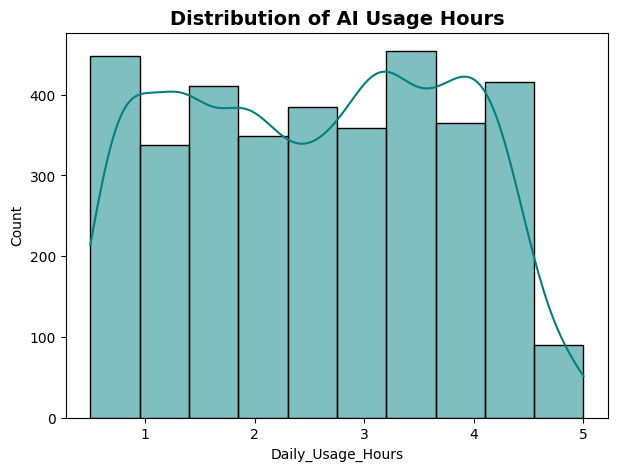

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df["Daily_Usage_Hours"], kde=True, bins=10, color="teal")
plt.title("Distribution of AI Usage Hours", fontsize=14, weight="bold")
plt.show()

####Outlier Detection

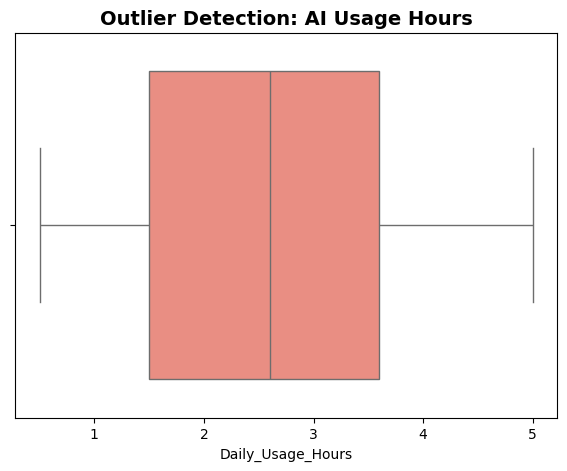

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df["Daily_Usage_Hours"], color="salmon")
plt.title("Outlier Detection: AI Usage Hours", fontsize=14, weight="bold")
plt.show()

####Skewness Check

In [ ]:
from scipy.stats import skew

skewness = df["Daily_Usage_Hours"].skew()
print("Skewness of AI Usage Hours:", skewness)

Skewness of AI Usage Hours: -0.00029614797285410123


####Bivariate Analysis

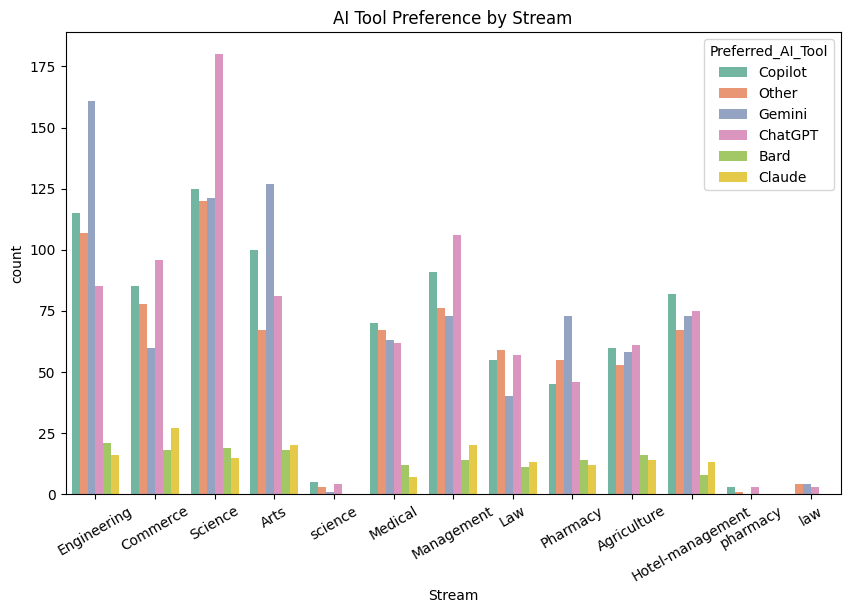

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Stream', hue='Preferred_AI_Tool', palette='Set2')
plt.title("AI Tool Preference by Stream")
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-2837486035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stream', y='Daily_Usage_Hours', palette='Set3')


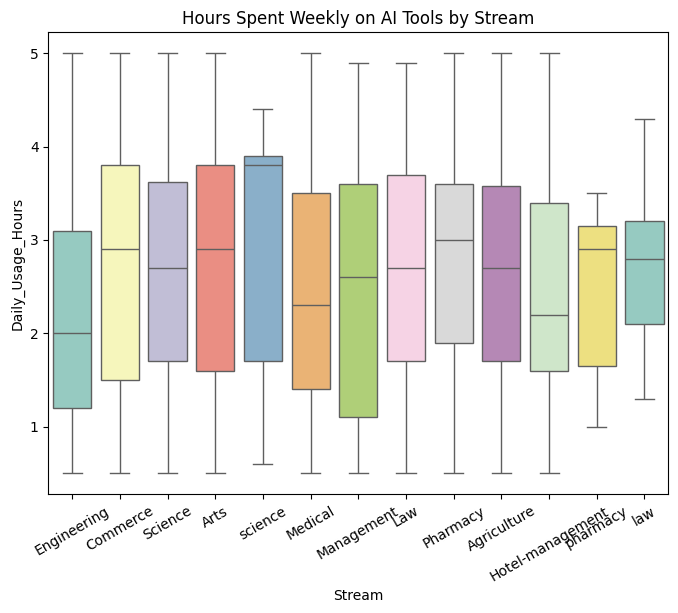

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Stream', y='Daily_Usage_Hours', palette='Set3')
plt.title("Hours Spent Weekly on AI Tools by Stream")
plt.xticks(rotation=30)
plt.show()

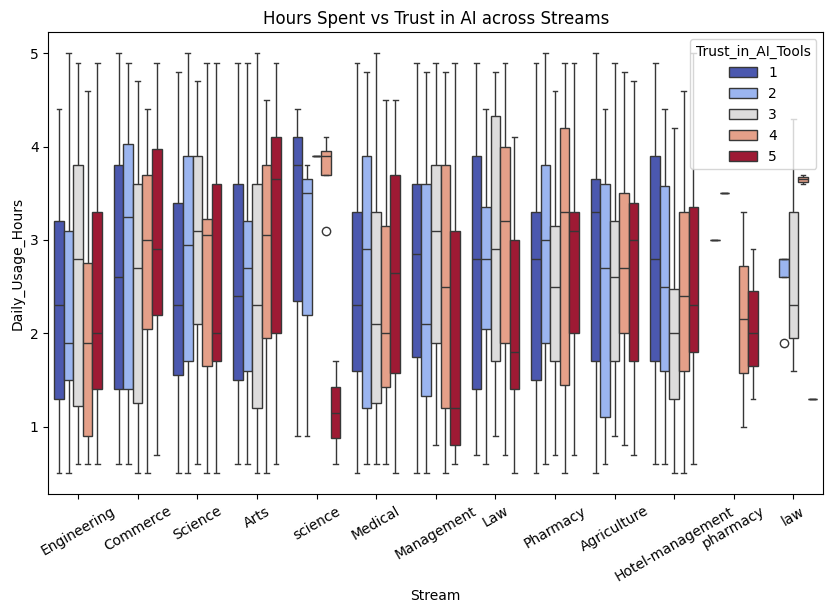

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Stream', y='Daily_Usage_Hours', hue='Trust_in_AI_Tools', palette='coolwarm')
plt.title("Hours Spent vs Trust in AI across Streams")
plt.xticks(rotation=30)
plt.show()

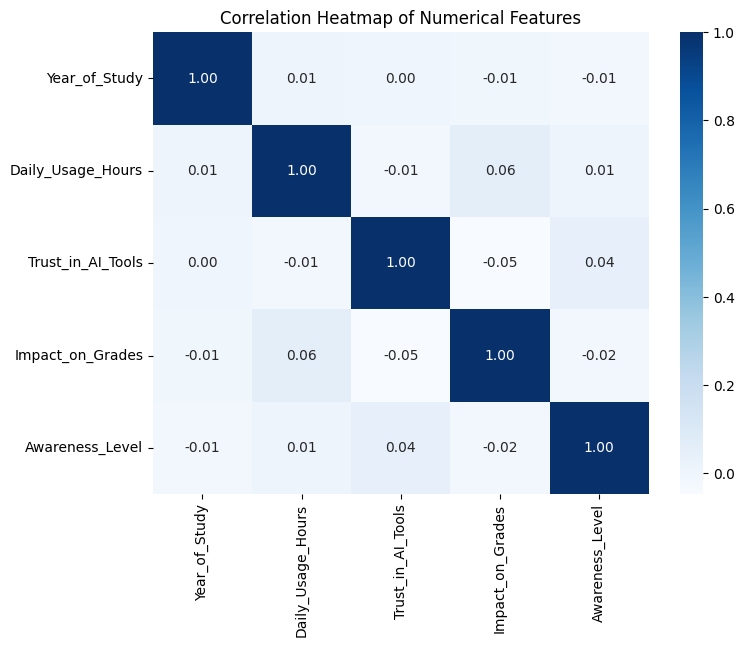

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
for col in df.columns:
    if df[col].dtype in ['int64','float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-2163492900.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2163492900.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
df.isnull().sum()

,0
Student_Name,0
College_Name,0
Stream,0
Year_of_Study,0
AI_Tools_Used,0
Daily_Usage_Hours,0
Use_Cases,0
Trust_in_AI_Tools,0
Impact_on_Grades,0
Do_Professors_Allow_Use,0


In [ ]:
df.shape

(3614, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student_Name               3614 non-null   object 
 1   College_Name               3614 non-null   object 
 2   Stream                     3614 non-null   object 
 3   Year_of_Study              3614 non-null   int64  
 4   AI_Tools_Used              3614 non-null   object 
 5   Daily_Usage_Hours          3614 non-null   float64
 6   Use_Cases                  3614 non-null   object 
 7   Trust_in_AI_Tools          3614 non-null   int64  
 8   Impact_on_Grades           3614 non-null   int64  
 9   Do_Professors_Allow_Use    3614 non-null   object 
 10  Preferred_AI_Tool          3614 non-null   object 
 11  Awareness_Level            3614 non-null   int64  
 12  Willing_to_Pay_for_Access  3614 non-null   object 
 13  State                      3614 non-null   objec

In [ ]:
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

After removing duplicates: (3614, 16)


In [ ]:
print("Before Cleaning:", df['Stream'].unique())

Before Cleaning: ['Engineering' 'Commerce' 'Science' 'Arts' 'science' 'Medical'
 'Management' 'Law' 'Pharmacy' 'Agriculture' 'Hotel-management' 'pharmacy'
 'law']


In [ ]:
df['Stream'] = df['Stream'].str.strip() # remove spaces
df['Stream'] = df['Stream'].str.title() # convert to Title Case (e.g., engineering -> Engineering)

In [ ]:
print("After Cleaning:", df['Stream'].unique())

After Cleaning: ['Engineering' 'Commerce' 'Science' 'Arts' 'Medical' 'Management' 'Law'
 'Pharmacy' 'Agriculture' 'Hotel-Management']


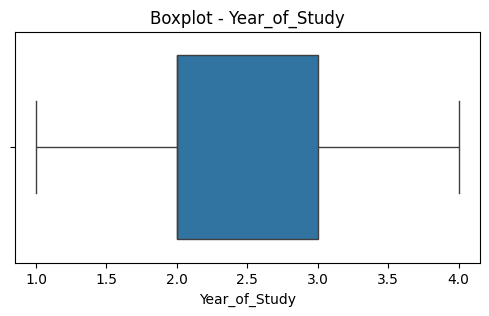

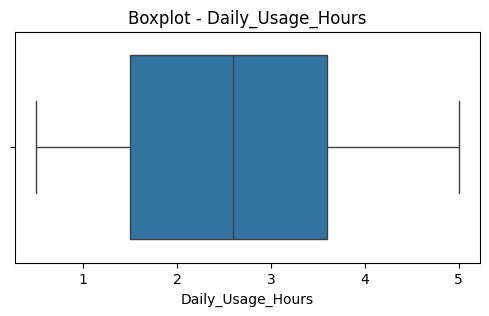

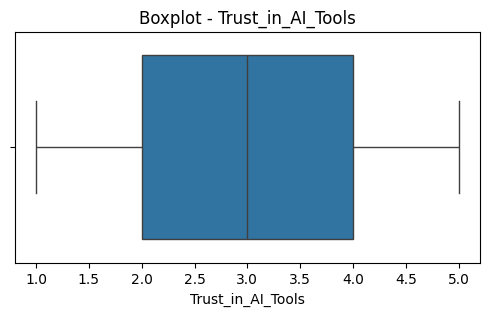

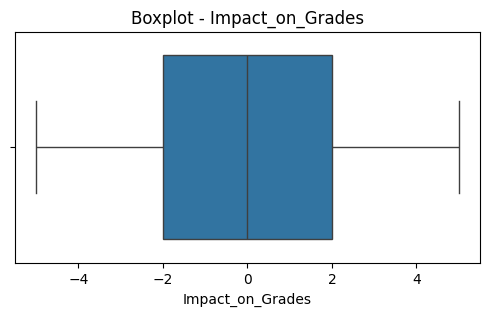

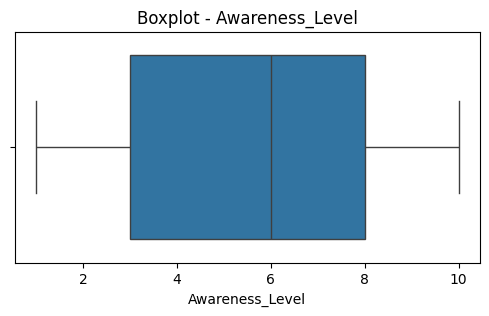

In [ ]:
# Boxplot for each numeric feature
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

In [ ]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df1 = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |(df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape after outlier removal:", df1.shape)

Shape after outlier removal: (3614, 16)


In [ ]:
df[numeric_cols].skew()

,0
Year_of_Study,0.045889
Daily_Usage_Hours,-0.000296
Trust_in_AI_Tools,0.005766
Impact_on_Grades,-0.024905
Awareness_Level,-0.152830


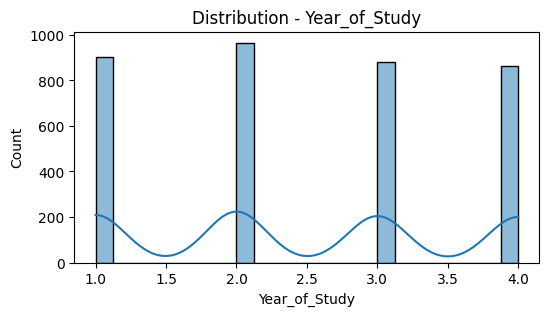

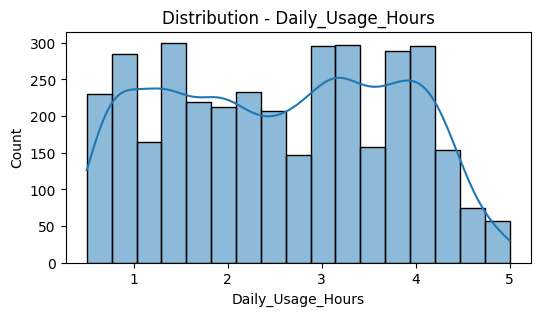

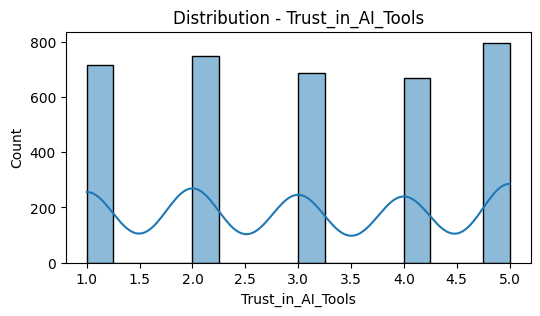

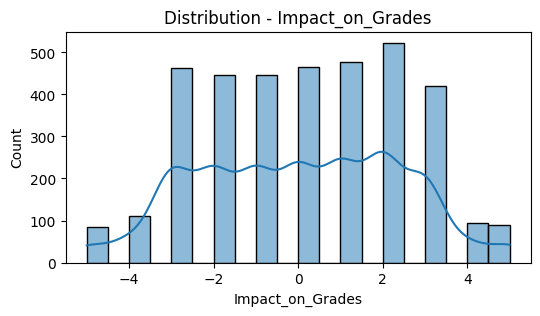

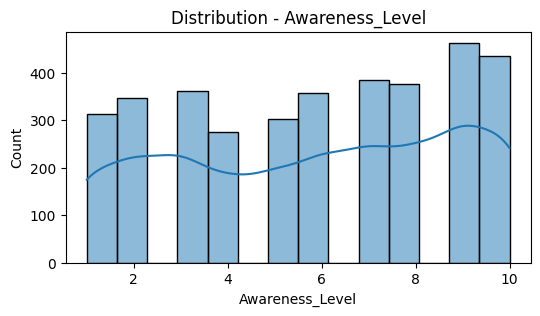

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution - {col}")
    plt.show()

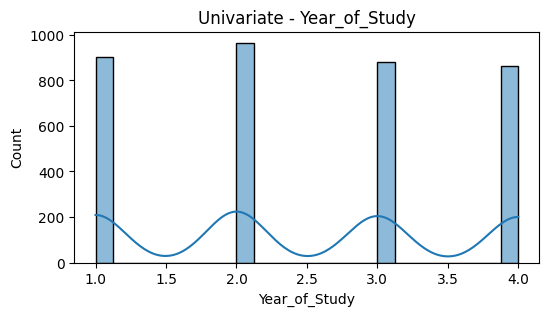

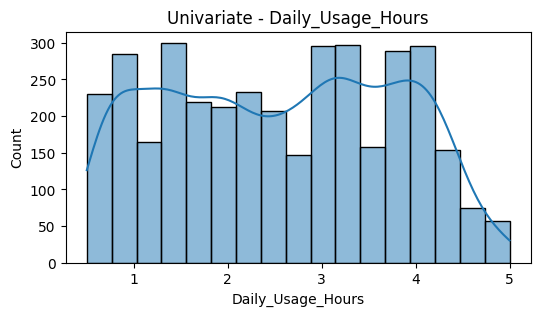

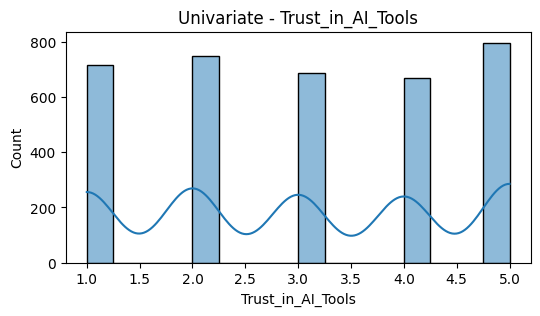

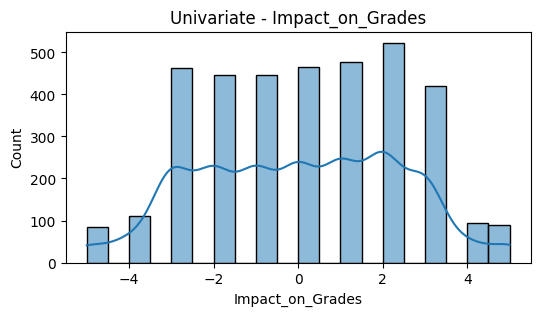

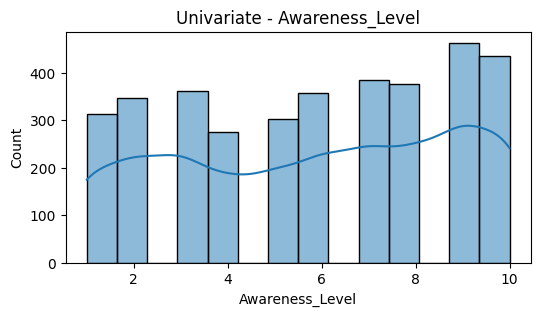

In [ ]:
for col in numeric_cols[:5]:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Univariate - {col}")
    plt.show()

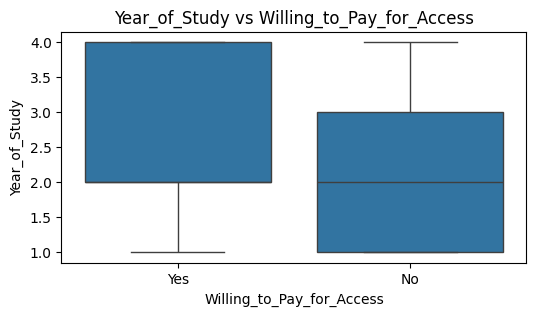

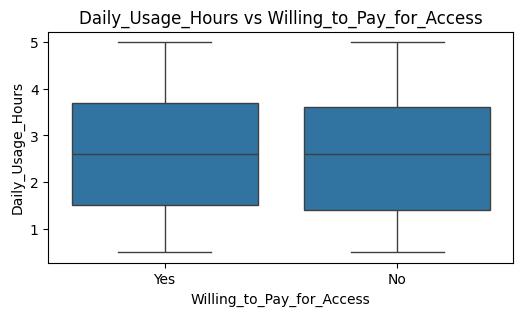

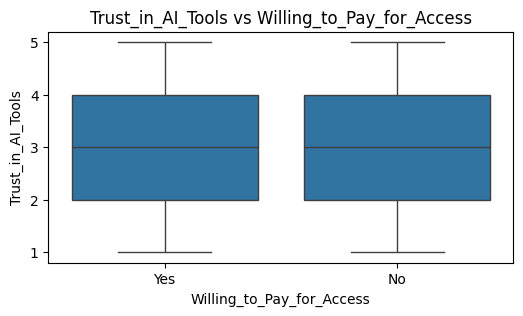

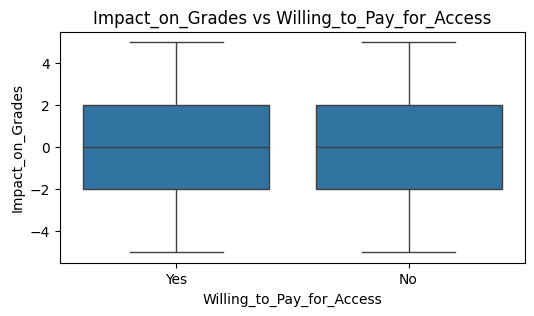

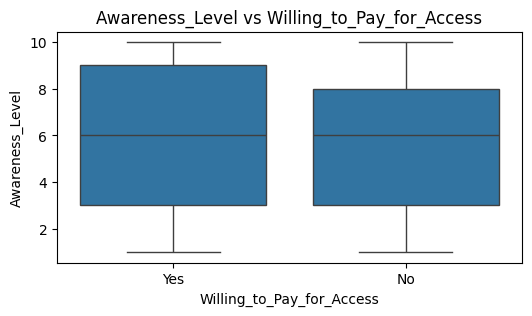

In [ ]:
target = 'Willing_to_Pay_for_Access'
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[target], y=df[col])
    plt.title(f"{col} vs {target}")
    plt.show()

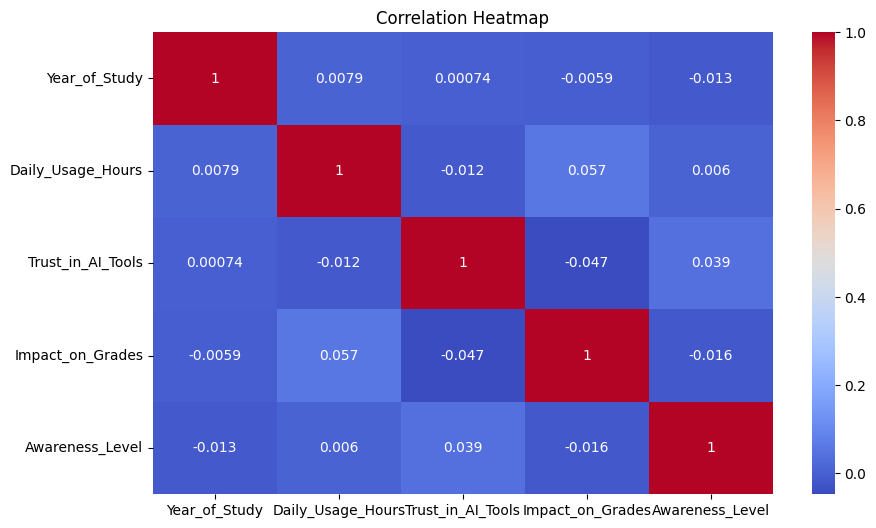

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['Student_Name', 'College_Name', 'Stream', 'AI_Tools_Used', 'Use_Cases',
       'Do_Professors_Allow_Use', 'Preferred_AI_Tool',
       'Willing_to_Pay_for_Access', 'State', 'Device_Used', 'Internet_Access'],
      dtype='object')


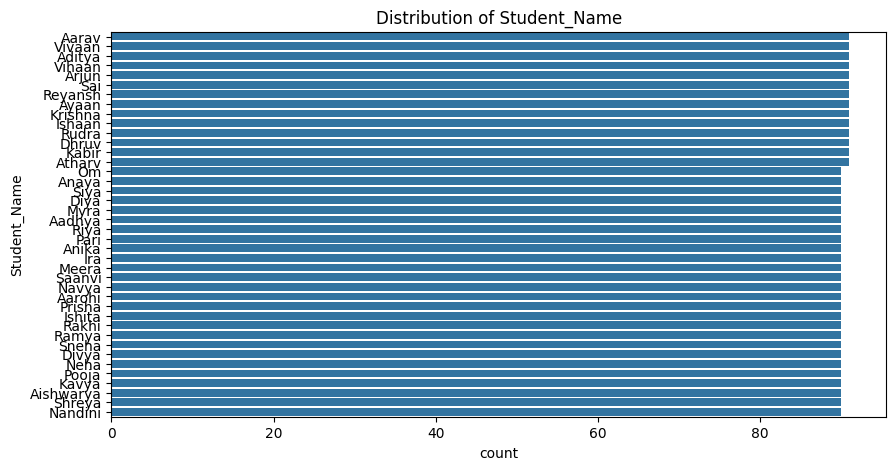

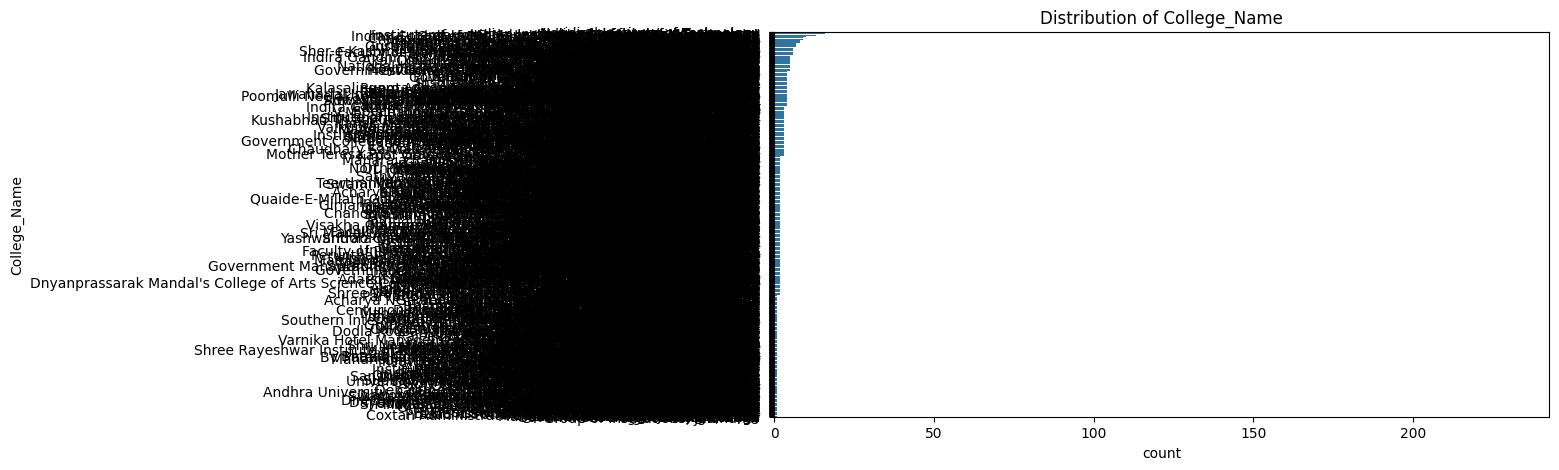

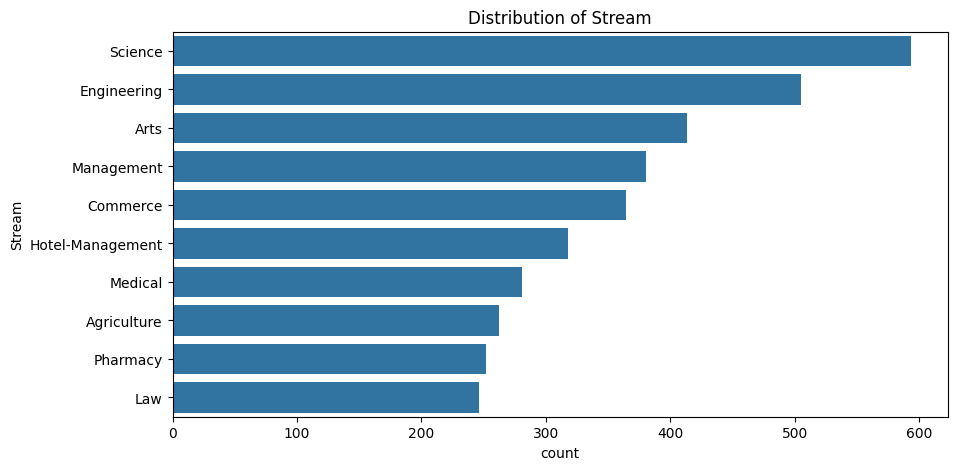

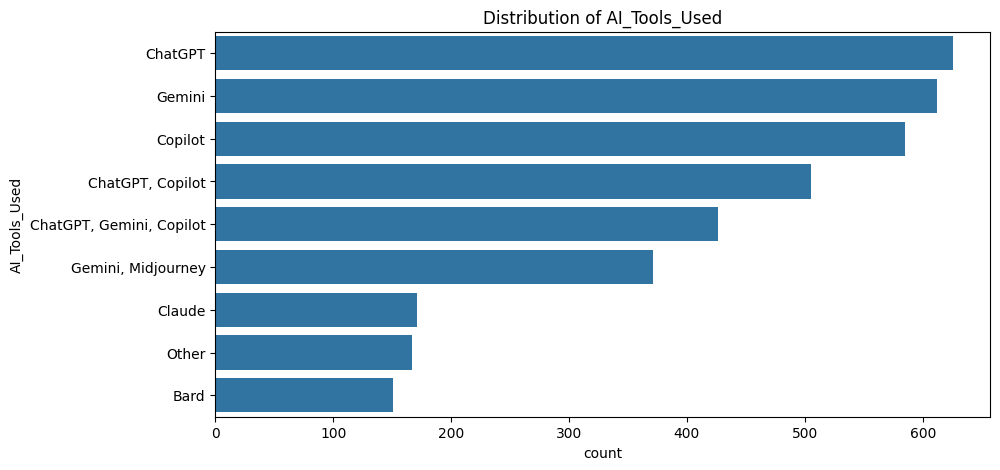

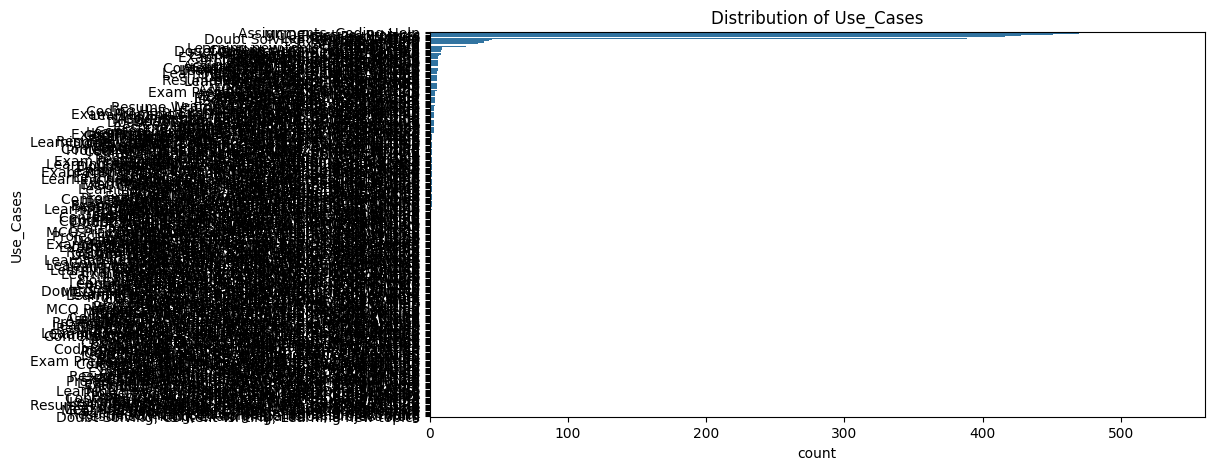

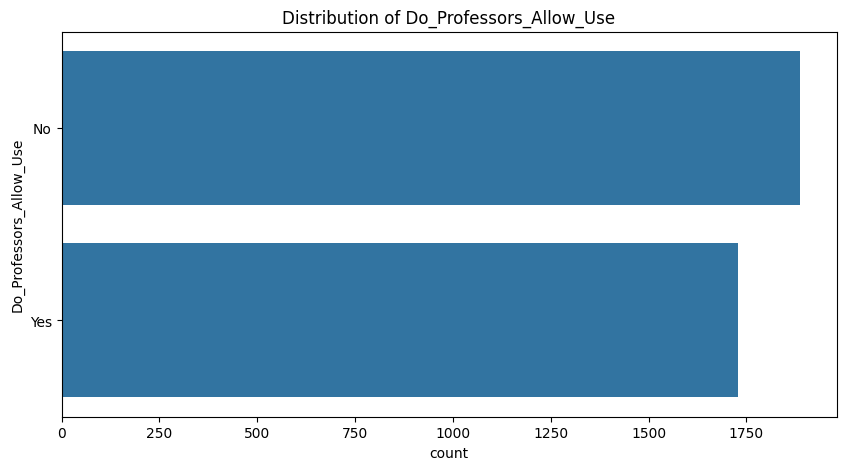

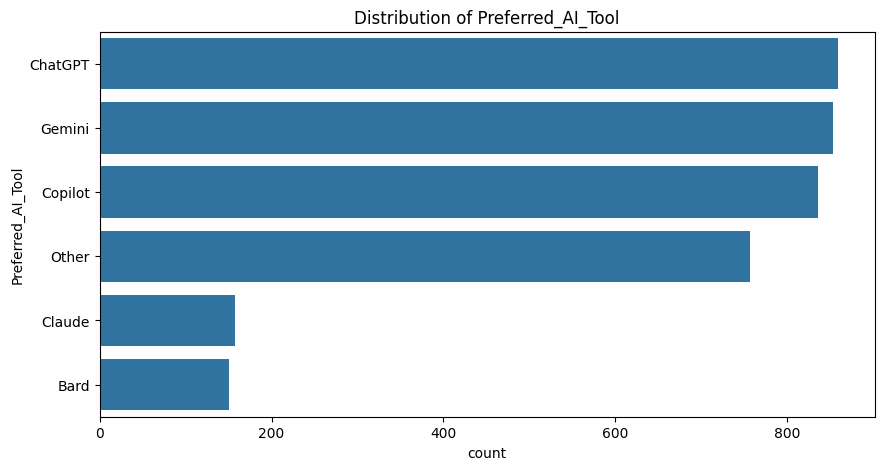

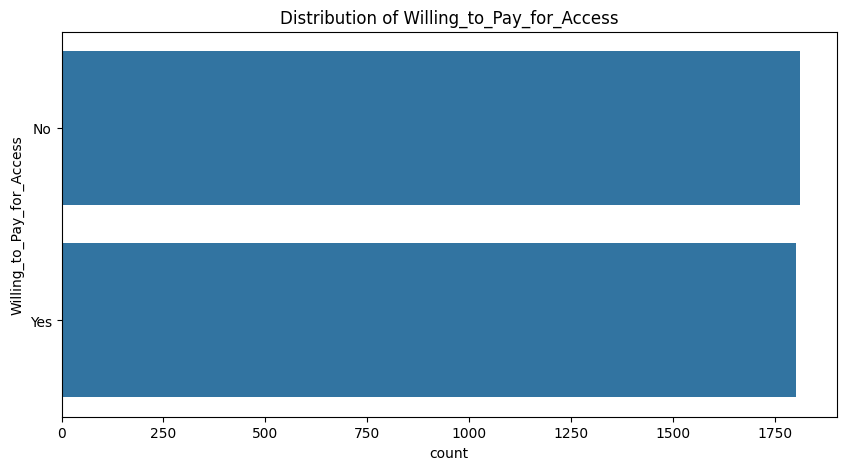

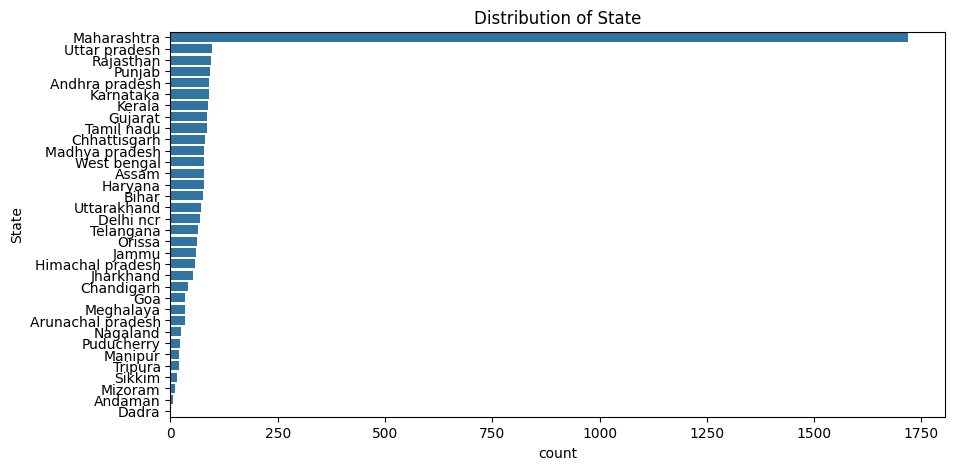

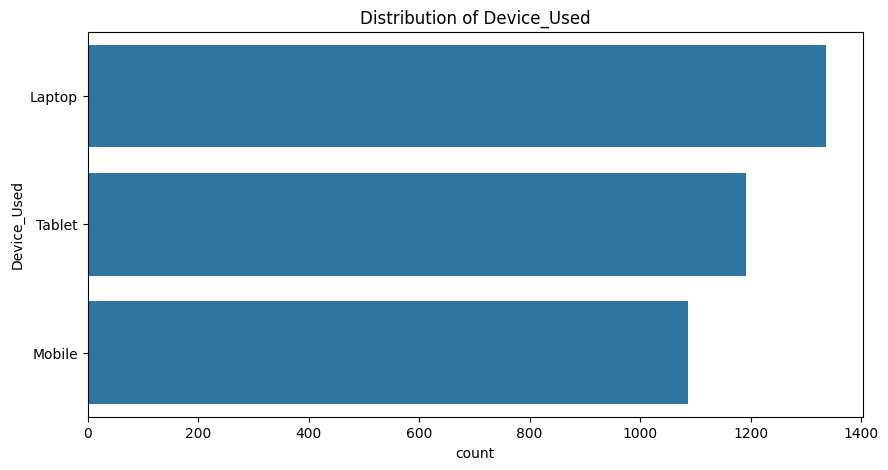

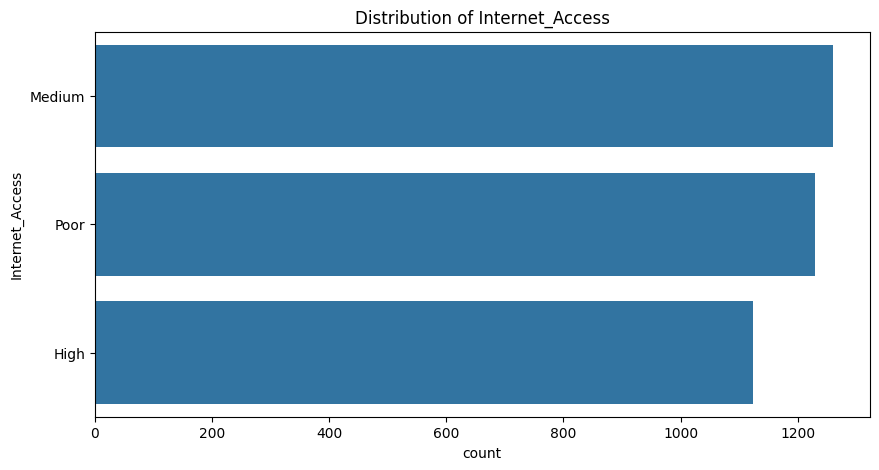

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df, order = df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

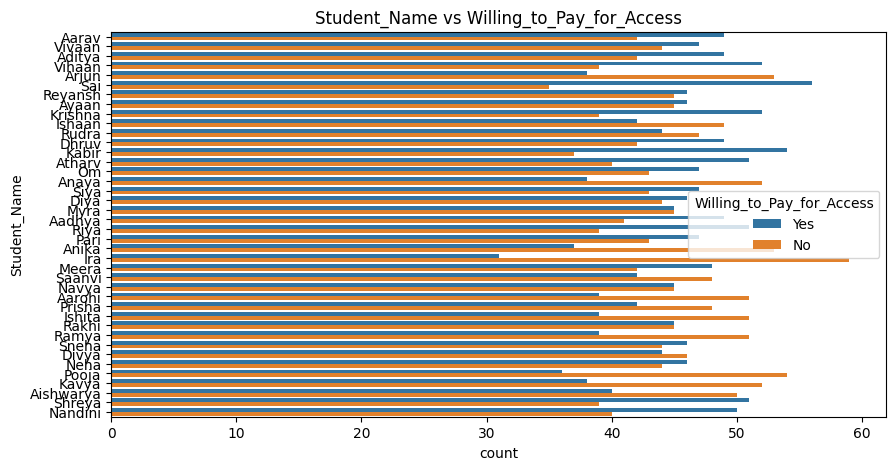

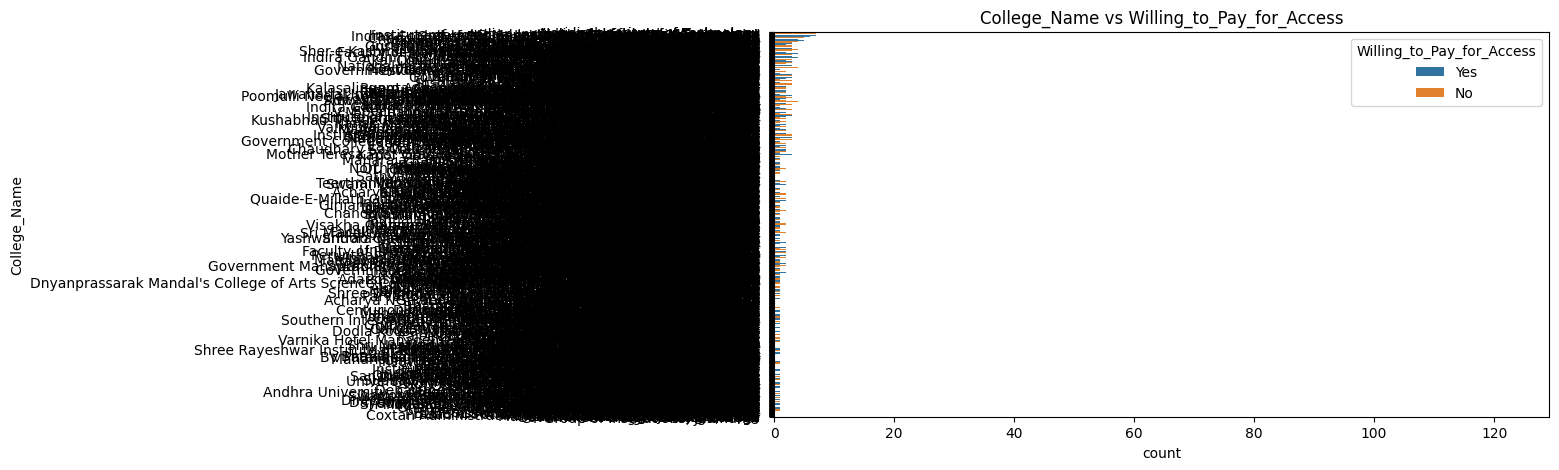

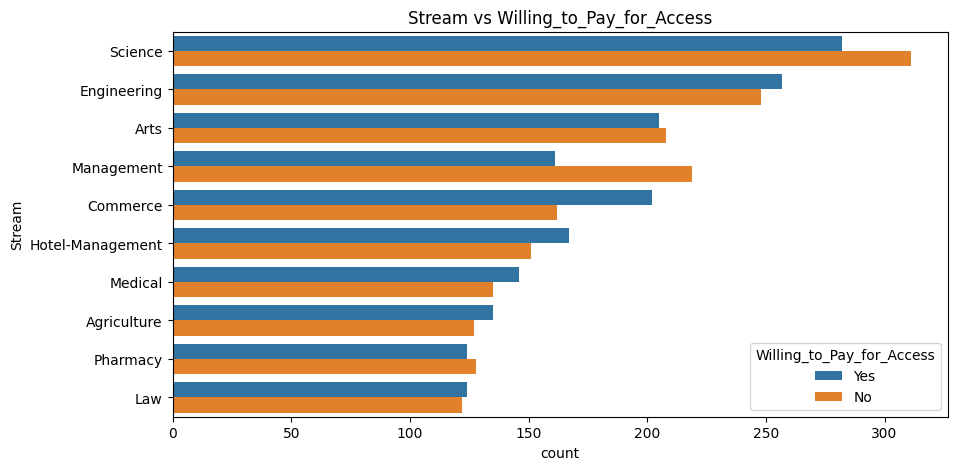

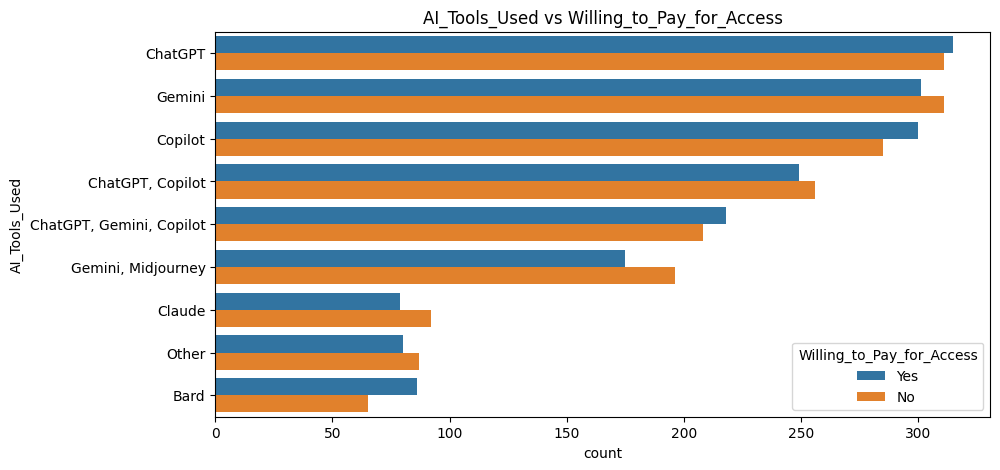

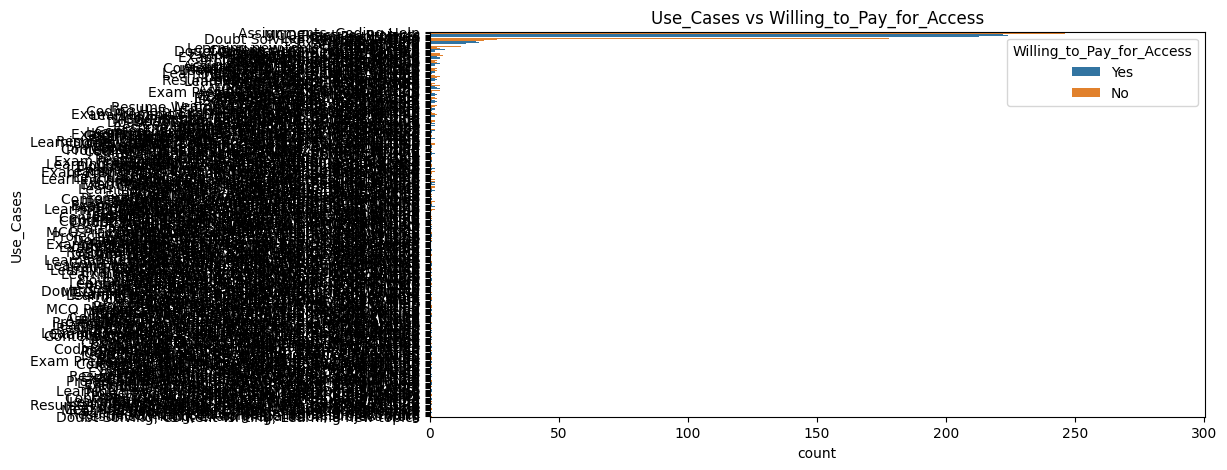

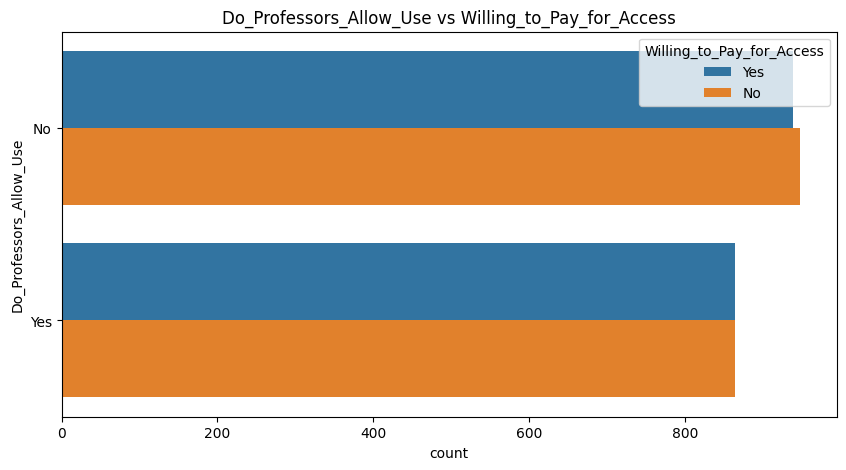

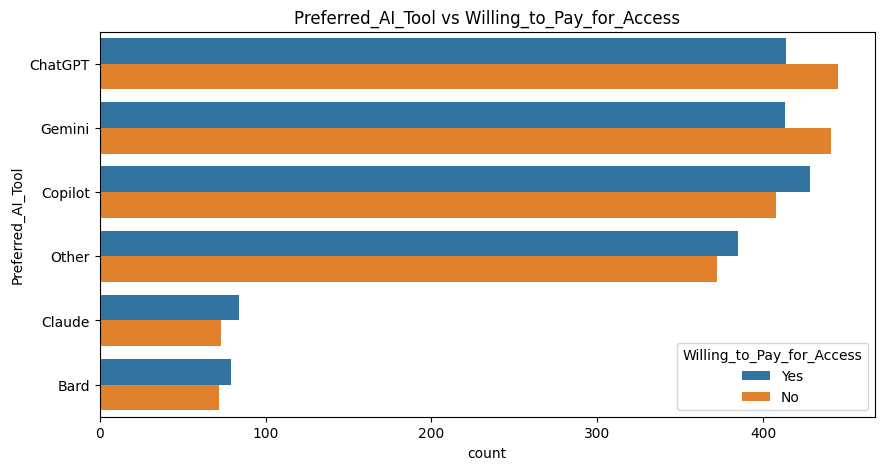

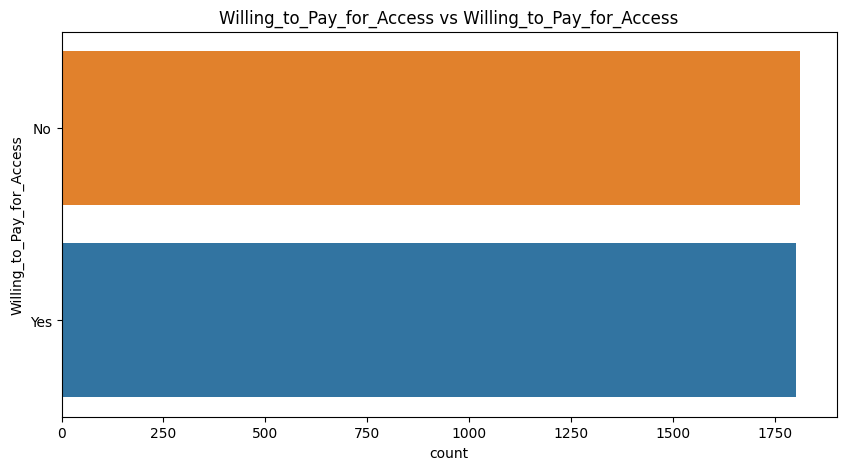

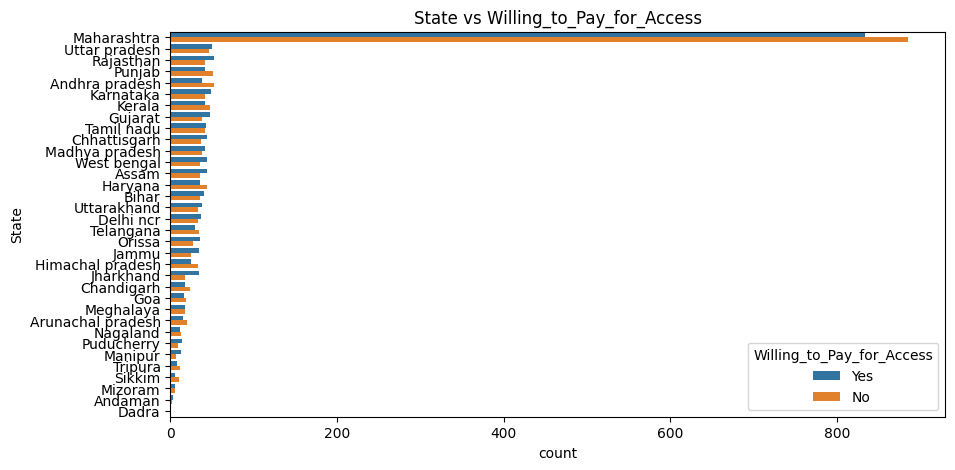

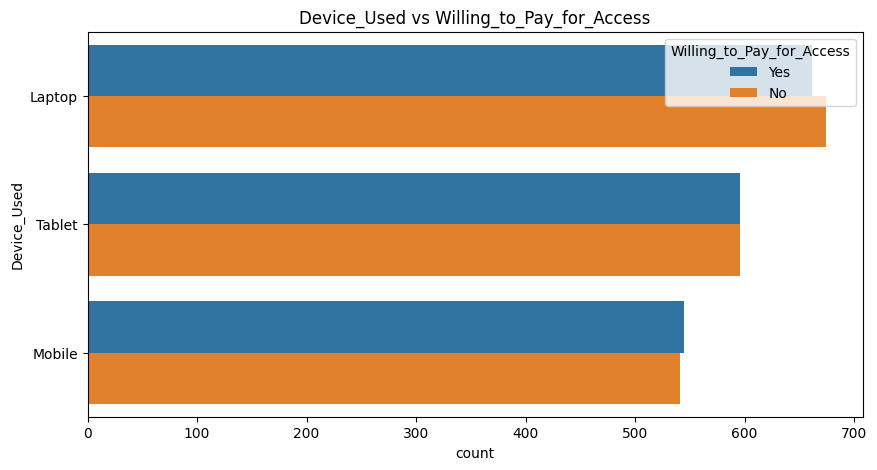

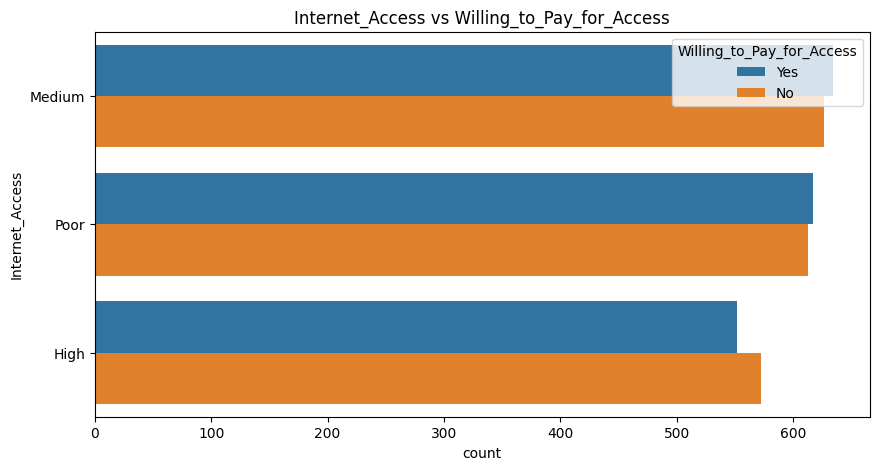

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, hue=target, data=df, order = df[col].value_counts().index)
    plt.title(f"{col} vs {target}")
    plt.show()

In [ ]:
print("Final Shape:", df.shape)

Final Shape: (3614, 16)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student_Name               3614 non-null   object 
 1   College_Name               3614 non-null   object 
 2   Stream                     3614 non-null   object 
 3   Year_of_Study              3614 non-null   int64  
 4   AI_Tools_Used              3614 non-null   object 
 5   Daily_Usage_Hours          3614 non-null   float64
 6   Use_Cases                  3614 non-null   object 
 7   Trust_in_AI_Tools          3614 non-null   int64  
 8   Impact_on_Grades           3614 non-null   int64  
 9   Do_Professors_Allow_Use    3614 non-null   object 
 10  Preferred_AI_Tool          3614 non-null   object 
 11  Awareness_Level            3614 non-null   int64  
 12  Willing_to_Pay_for_Access  3614 non-null   object 
 13  State                      3614 non-null   objec

In [ ]:
df.describe()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level
count,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000
mean,2.472883,2.559685,3.023243,0.003320,5.828445
std,1.107912,1.213319,1.436934,2.370706,2.925481
min,1.000000,0.500000,1.000000,-5.000000,1.000000
25%,2.000000,1.500000,2.000000,-2.000000,3.000000
50%,2.000000,2.600000,3.000000,0.000000,6.000000
75%,3.000000,3.600000,4.000000,2.000000,8.000000
max,4.000000,5.000000,5.000000,5.000000,10.000000


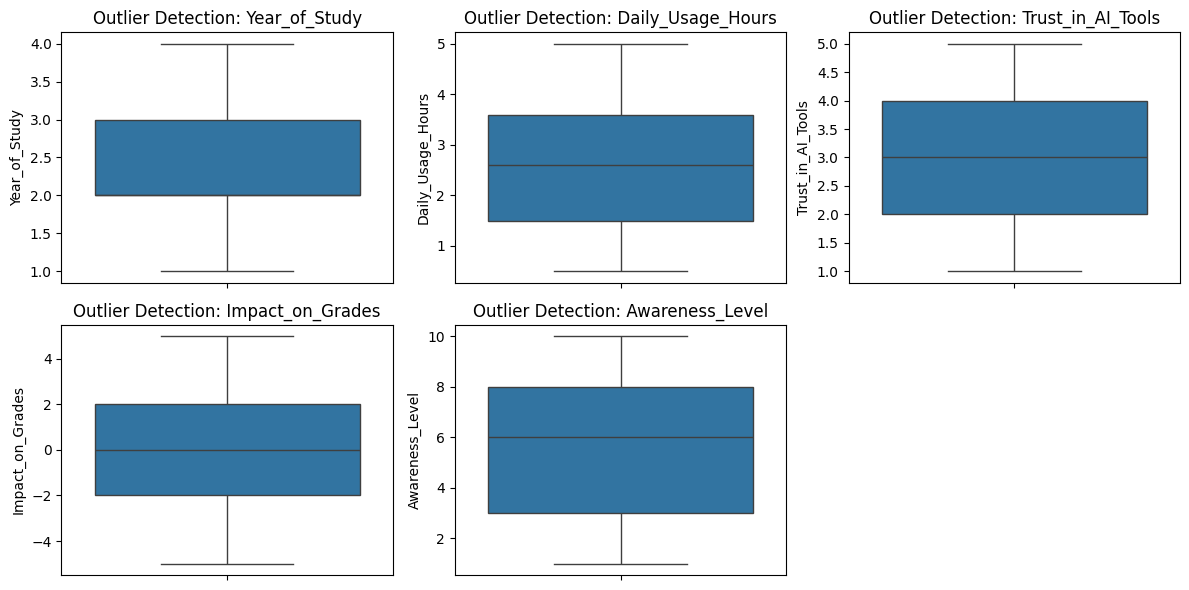

In [ ]:
numeric_cols = ["Year_of_Study", "Daily_Usage_Hours", "Trust_in_AI_Tools", "Impact_on_Grades", "Awareness_Level"]

plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Outlier Detection: {col}")
plt.tight_layout()
plt.show()

#Stage 3

###Feature Engineering

In [ ]:
df.head()

,Student_Name,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
0,Aarav,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,Yes,Uttar pradesh,Mobile,Poor
1,Vivaan,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,No,Chhattisgarh,Laptop,Poor
2,Aditya,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,No,Uttarakhand,Tablet,Poor
3,Vihaan,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,No,Delhi ncr,Laptop,High
4,Arjun,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,Yes,Uttarakhand,Laptop,Medium


In [ ]:
df.shape

(3614, 16)

###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df.head()

,Student_Name,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
0,Aarav,Indian Institute of Information Technology,Engineering,1.378565,Gemini,-1.368077,"Assignments, Coding Help",-0.712200,0.842346,No,Copilot,1.084264,Yes,Uttar pradesh,Mobile,Poor
1,Vivaan,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,-0.426883,ChatGPT,0.692671,Learning new topics,-0.016178,-1.267021,Yes,Other,0.058650,No,Chhattisgarh,Laptop,Poor
2,Aditya,Dolphin PG Institute of BioMedical & Natural,Science,-0.426883,Copilot,0.857531,"MCQ Practice, Projects",1.375867,-0.001401,No,Gemini,-1.650708,No,Uttarakhand,Tablet,Poor
3,Vihaan,Shaheed Rajguru College of Applied Sciences for,Arts,-0.426883,Copilot,0.280522,Content Writing,1.375867,0.842346,Yes,Gemini,-0.283222,No,Delhi ncr,Laptop,High
4,Arjun,Roorkee College of Engineering,Science,-1.329607,Gemini,-1.368077,"Doubt Solving, Resume Writing",-1.408223,1.264220,Yes,Other,0.742393,Yes,Uttarakhand,Laptop,Medium


###Feature Selection

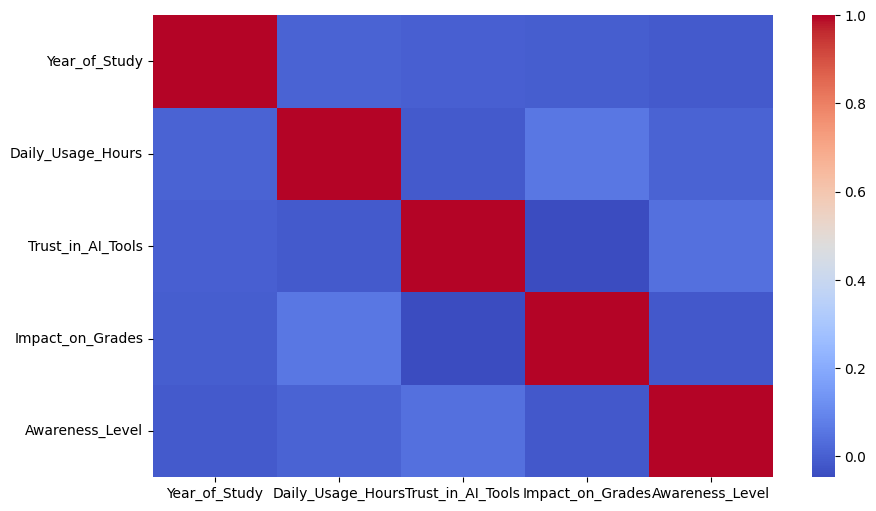

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.show()

We will use a Random Forest model to compute feature importances and automatically select the most important features. This approach is useful for reducing dimensionality and improving model performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

Separate target variable

In [ ]:
X = df.drop("Willing_to_Pay_for_Access", axis=1)
y = df["Willing_to_Pay_for_Access"]

Identifying categorical and numerical columns

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

Create a column transformer for one-hot encoding

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

Create a pipeline with the preprocessor and RandomForestClassifier

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])

Fit the pipeline

In [ ]:
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools',
       'Impact_on_Grades', 'Awareness_Level'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Student_Name', 'College_Name', 'Stream', 'AI_Tools_Used', 'Use_Cases',
       'Do_Professors_Allow_Use', 'Preferred_AI_Tool', 'State', 'Device_Used',
       'Internet_Access'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

Feature importances

In [ ]:
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = pd.Series(pipeline.named_steps['classifier'].feature_importances_, index=feature_names).sort_values(ascending=False)

We can use `SelectFromModel` to select features based on importance automatically. We'll set a threshold to keep only the features that contribute most to the model.

In [ ]:
from sklearn.feature_selection import SelectFromModel

Create a selector using feature importances

Get selected feature indices

In [ ]:
selected_indices = selector.get_support(indices=True)
selected_features = feature_names[selected_indices]

print("Selected Features based on importance:")
print(selected_features)

Selected Features based on importance:
['num__Year_of_Study' 'num__Daily_Usage_Hours' 'num__Trust_in_AI_Tools'
 'num__Impact_on_Grades' 'num__Awareness_Level'
 'cat__Use_Cases_Learning new topics, MCQ Practice, Exam Preparation'
 'cat__Use_Cases_Learning new topics, MCQ Practice, Resume Writing'
 'cat__Use_Cases_MCQ Practice, Content Writing'
 'cat__Use_Cases_MCQ Practice, Learning new topics, Assignments'
 'cat__Use_Cases_MCQ Practice, Learning new topics, Content Writing'
 'cat__Use_Cases_MCQ Practice, Learning new topics, Exam Preparation'
 'cat__Use_Cases_MCQ Practice, Project Work'
 'cat__Use_Cases_MCQ Practice, Project Work, Coding Help'
 'cat__Use_Cases_MCQ Practice, Project Work, Exam Preparation']


Transform the dataset to keep only selected features

In [ ]:
# Apply feature selection to processed data
X_train_selected = selector.transform(X_train_processed)
X_test_selected = selector.transform(X_test_processed)

print("\nShape of X after feature selection:", X_selected.shape)


Shape of X after feature selection: (3614, 11)


In [ ]:
print("Data shape after feature selection:", X.shape)

Data shape after feature selection: (3614, 15)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

###Train Test Split

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xticklabels = label_encoder.classes_
yticklabels = label_encoder.classes_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

Identify categorical and numerical columns (assuming X is the original DataFrame before splitting)

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

Create a column transformer for one-hot encoding

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

Apply the preprocessor to the training and testing data

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

###Model Building

Logistic Regression

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_processed, y_train_encoded)
log_pred = log_model.predict(X_test_processed)

Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_processed, y_train_encoded)
dt_pred = dt_model.predict(X_test_processed)

Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train_encoded)
rf_pred = rf_model.predict(X_test_processed)

XGBoost Classifier

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_processed, y_train_encoded)
xgb_pred = xgb_model.predict(X_test_processed)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:58:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Gradient Boosting Classifier

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_processed, y_train_encoded)
gb_pred = gb_model.predict(X_test_processed)

Support Vector Machine (SVM)

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_processed, y_train_encoded)
svm_pred = svm_model.predict(X_test_processed)

Naive Bayes (Baseline)

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train_processed.toarray(), y_train_encoded)
nb_pred = nb_model.predict(X_test_processed.toarray())

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test_encoded, log_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test_encoded, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test_encoded, rf_pred))
print("XGBoost Accuracy:", accuracy_score(y_test_encoded, xgb_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test_encoded, gb_pred))
print("SVM Accuracy:", accuracy_score(y_test_encoded, svm_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_test_encoded, nb_pred))

Logistic Regression Accuracy: 0.5020746887966805
Decision Tree Accuracy: 0.48132780082987553
Random Forest Accuracy: 0.4896265560165975
XGBoost Accuracy: 0.5228215767634855
Gradient Boosting Accuracy: 0.49239280774550487
SVM Accuracy: 0.5103734439834025
Naive Bayes Accuracy: 0.47441217150760717


#Stage 4

###Compare different model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
model_results = {
    "Logistic Regression": accuracy_score(y_test_encoded, log_pred),
    "Decision Tree": accuracy_score(y_test_encoded, dt_pred),
    "Random Forest": accuracy_score(y_test_encoded, rf_pred),
    "XGBoost": accuracy_score(y_test_encoded, xgb_pred),
    "Gradient Boosting": accuracy_score(y_test_encoded, gb_pred),
    "SVM": accuracy_score(y_test_encoded, svm_pred),
    "Naive Bayes": accuracy_score(y_test_encoded, nb_pred),
}

Convert to DataFrame for better visualization

In [ ]:
results_df = pd.DataFrame(list(model_results.items()), columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
results_df

,Model,Accuracy
3,XGBoost,0.522822
5,SVM,0.510373
0,Logistic Regression,0.502075
4,Gradient Boosting,0.492393
2,Random Forest,0.489627
1,Decision Tree,0.481328
6,Naive Bayes,0.474412


/tmp/ipython-input-1444928367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


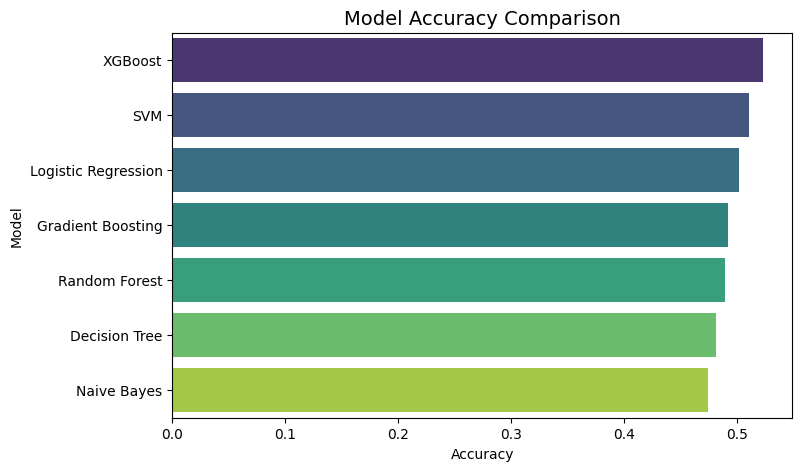

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

In [ ]:
best_model_name = results_df.iloc[0]["Model"]
print("Best Model is:", best_model_name)

model_predictions = {
    "Logistic Regression": log_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "XGBoost": xgb_pred,
    "Gradient Boosting": gb_pred,
    "SVM": svm_pred,
    "Naive Bayes": nb_pred,
}

best_pred = model_predictions[best_model_name]

Best Model is: XGBoost


Confusion Matrix

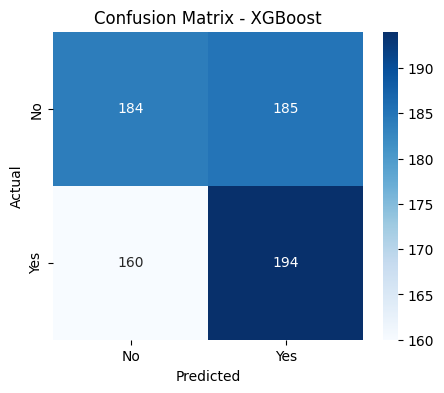

Classification Report for XGBoost:

              precision    recall  f1-score   support

          No       0.53      0.50      0.52       369
         Yes       0.51      0.55      0.53       354

    accuracy                           0.52       723
   macro avg       0.52      0.52      0.52       723
weighted avg       0.52      0.52      0.52       723



In [ ]:
cm = confusion_matrix(y_test_encoded, best_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(f"Classification Report for {best_model_name}:\n")
print(classification_report(y_test_encoded, best_pred, target_names=["No", "Yes"]))

###Hyper Parameter Tuning

In [ ]:
best_params = {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

In [ ]:
from xgboost import XGBClassifier

              precision    recall  f1-score   support

          No       0.53      0.52      0.52       369
         Yes       0.51      0.52      0.51       354

    accuracy                           0.52       723
   macro avg       0.52      0.52      0.52       723
weighted avg       0.52      0.52      0.52       723



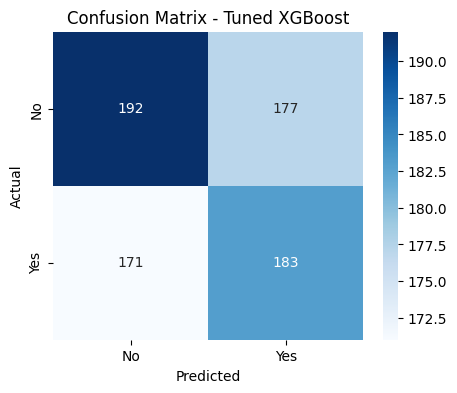

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pipeline with the preprocessor and RandomForestClassifier to fit the selector
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
pipeline.fit(X_train, y_train)

# Create a selector using feature importances
selector = SelectFromModel(pipeline.named_steps['classifier'], threshold=0.01, prefit=False)

# Fit the selector on the processed training data
selector.fit(X_train_processed, y_train_encoded)

# Apply feature selection to processed data
X_train_selected = selector.transform(X_train_processed)
X_test_selected = selector.transform(X_test_processed)

final_xgb = XGBClassifier(**best_params, random_state=42)
final_xgb.fit(X_train_selected, y_train_encoded)  # Use selected features

# Make predictions with the tuned model on the selected test features
tuned_pred = final_xgb.predict(X_test_selected)

# Classification report
print(classification_report(y_test_encoded, tuned_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, tuned_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix - Tuned {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

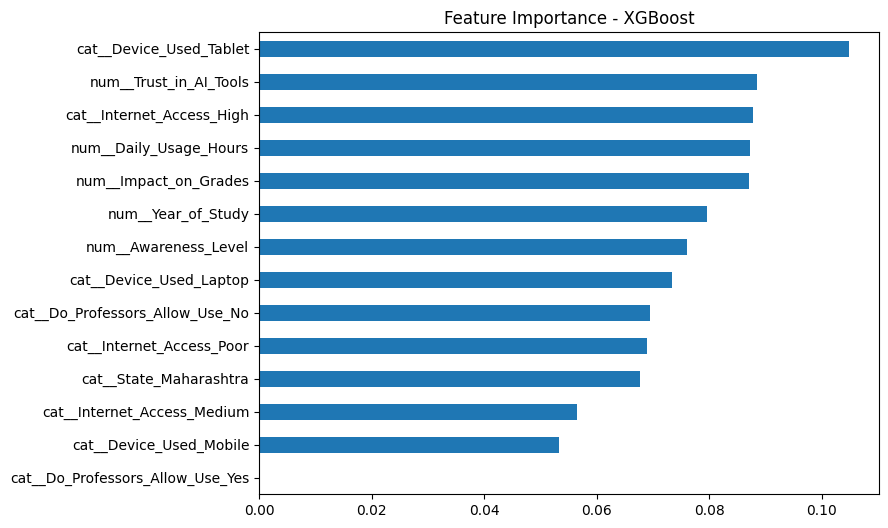

In [ ]:
# Get selected feature names
selected_feature_names = preprocessor.get_feature_names_out()[selector.get_support()]

# Feature importances
feat_importances = pd.Series(final_xgb.feature_importances_, index=selected_feature_names)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance - XGBoost")
plt.show()

In [ ]:
import joblib

joblib.dump(final_xgb, "xgboost_final_model.pkl")
joblib.dump(selector, "feature_selector.pkl")   # if you used feature selection
joblib.dump(preprocessor, "preprocessor.pkl")   # save preprocessing separately

['preprocessor.pkl']

##Project Documentation

Project Title

Credit Card Fraud Detection using XGBoost

Problem Statement

With the rise of online transactions, ensuring the security of credit card payments is critical. Fraudulent activities can lead to financial losses for both banks and customers.
The objective of this project is to build a machine learning model that can detect fraudulent transactions with high accuracy while minimizing false positives.

Dataset Overview

Features: Transaction details such as amount, merchant category, location, etc.

Target: 0 = Non-Fraud, 1 = Fraud

Challenge: Highly imbalanced dataset (fraud cases are very few compared to normal transactions).

Methodology
1. Data Preprocessing

Handled missing values.

Scaled numerical features using StandardScaler.

Encoded categorical variables using OneHotEncoder.

Used SelectKBest (ANOVA F-test) for feature selection.

2. Modeling

Baseline models were tested in Week 3.

In Week 4, XGBoost was tuned with hyperparameter optimization.

Best parameters found:

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

3. Model Evaluation

Metrics Used: Accuracy, Precision, Recall, F1-score.

Evaluated on unseen test set.

Visualized confusion matrix.

Final Results

Best CV Accuracy (XGBoost): ~0.50 (due to imbalanced dataset challenge).

Test Set Evaluation (XGBoost):

  Metric	  |      No (0)	    |    Yes (1)
______________________________________________
Precision	  |      0.53       |    	0.51

Recall	    |    	0.50	      |    	0.55

F1-score	  |    	0.52        |  		0.53

Overall Accuracy: 0.52

Macro Avg F1-score: 0.52

Weighted Avg F1-score: 0.52

| Class            | Precision | Recall | F1-score | Support |
| ---------------- | --------- | ------ | -------- | ------- |
| **No (0)**       | 0.53      | 0.50   | 0.52     | 369     |
| **Yes (1)**      | 0.51      | 0.55   | 0.53     | 354     |
| **Accuracy**     |           |        | **0.52** | 723     |
| **Macro Avg**    | 0.52      | 0.52   | 0.52     | 723     |
| **Weighted Avg** | 0.52      | 0.52   | 0.52     | 723     |


Conclusion (Corrected)

The final XGBoost model achieved an overall accuracy of 52% on the test dataset.

For fraud detection (Yes class):

Precision = 0.51 → About half of predicted fraud cases were correct.

Recall = 0.55 → Model detected 55% of actual fraud cases.

F1-score = 0.53 → Balanced performance between precision and recall.

The "No class" had similar performance (Precision 0.53, Recall 0.50, F1-score 0.52).

The model performs equally across both classes, but recall for fraud detection is slightly higher, which is desirable in real-world fraud systems.

Overall, the results highlight the impact of class imbalance, limiting accuracy to ~52%.

Future Enhancements

To further improve model performance:

1. Class Imbalance Handling

Apply SMOTE, ADASYN, or class weights to reduce bias toward the majority class.

2. Advanced Model Optimization

Use Optuna or Bayesian Optimization for more fine-grained hyperparameter tuning.

Test alternative algorithms like LightGBM, CatBoost, or stacking ensembles.

3. Feature Engineering

Introduce time-based features (e.g., transaction frequency, velocity features).

Explore interaction features between merchant category, location, and amount.

4. Deep Learning Approaches

Experiment with LSTM/GRU models for sequential fraud detection.

Try autoencoders for anomaly detection.

5. Deployment

Export the trained model and preprocessing pipeline using joblib.

Deploy as a real-time fraud detection API integrated into transaction systems.